<a href="https://colab.research.google.com/github/John-Akech/Polynomial-Regression/blob/master/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

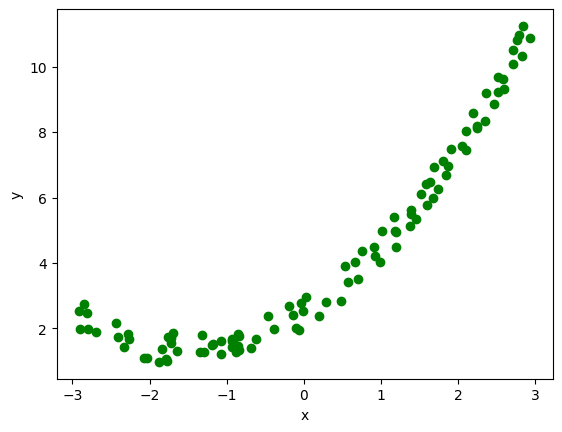

In [2]:

# load the dataset
x = 6 * np.random.rand(100, 1) -3
y = 0.5 * x ** 2 + 1.5 * x + 2 + np.random.rand(100, 1)
# quadratic equation used- y = 0.5x^2 + 1.5x + 2 + outliers
plt.scatter(x, y, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
# Implement simple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [5]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regressor.predict(x_test))

In [6]:
score

0.8079342518794053

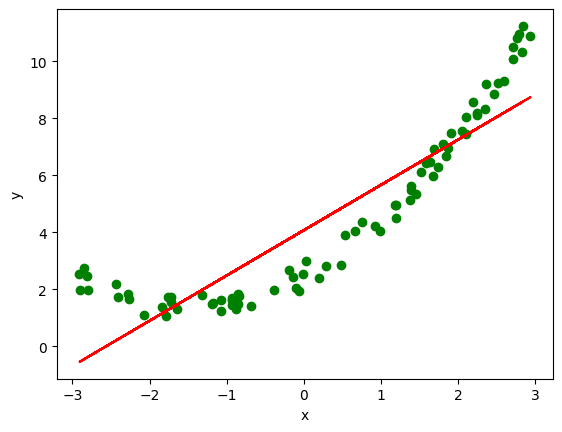

In [7]:
# Visualize using lot
plt.scatter(x_train, y_train, color='green')
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
# Apply polynomial
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4, include_bias=True)
#x_poly = poly.fit_transform(x)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [9]:
x_train_poly

array([[ 1.00000000e+00, -1.97028276e-01,  3.88201414e-02,
        -7.64866552e-03,  1.50700338e-03],
       [ 1.00000000e+00,  2.23609650e+00,  5.00012756e+00,
         1.11807677e+01,  2.50012756e+01],
       [ 1.00000000e+00,  9.83938290e-01,  9.68134558e-01,
         9.52584661e-01,  9.37284523e-01],
       [ 1.00000000e+00,  6.56827436e-01,  4.31422281e-01,
         2.83369991e-01,  1.86125184e-01],
       [ 1.00000000e+00,  5.32115199e-01,  2.83146585e-01,
         1.50666601e-01,  8.01719884e-02],
       [ 1.00000000e+00, -1.18370473e+00,  1.40115688e+00,
        -1.65855602e+00,  1.96324059e+00],
       [ 1.00000000e+00,  2.46428511e+00,  6.07270108e+00,
         1.49648668e+01,  3.68776985e+01],
       [ 1.00000000e+00, -1.18669229e+00,  1.40823860e+00,
        -1.67114589e+00,  1.98313594e+00],
       [ 1.00000000e+00, -2.42890827e+00,  5.89959536e+00,
        -1.43295759e+01,  3.48052254e+01],
       [ 1.00000000e+00, -1.72475852e+00,  2.97479196e+00,
        -5.13079779e+00

In [10]:
from sklearn.metrics import r2_score
regressor.fit(x_train_poly, y_train)
y_pred = regressor.predict(x_test_poly)
score = r2_score(y_test, y_pred)



In [11]:
score

0.9827621741509983

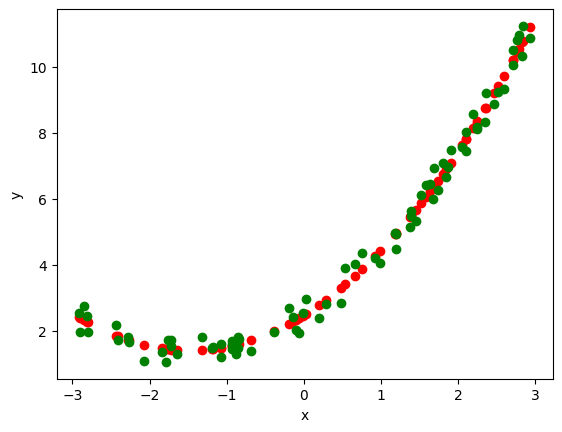

In [12]:
plt.scatter(x_train, regressor.predict(x_train_poly), color='red')
plt.scatter(x_train, y_train, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
print(regressor.coef_)

[[0.00000000e+00 1.46337788e+00 4.99057632e-01 3.38641355e-03
  6.12331969e-04]]


In [14]:
# Prediction of the new dataset
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = regressor.predict(poly.transform(x_new))
x_new_poly

array([[ 2.54858966],
       [ 2.5036486 ],
       [ 2.45961895],
       [ 2.41650009],
       [ 2.37429139],
       [ 2.33299224],
       [ 2.29260205],
       [ 2.25312023],
       [ 2.2145462 ],
       [ 2.17687942],
       [ 2.14011932],
       [ 2.10426538],
       [ 2.06931707],
       [ 2.03527387],
       [ 2.0021353 ],
       [ 1.96990085],
       [ 1.93857006],
       [ 1.90814246],
       [ 1.8786176 ],
       [ 1.84999504],
       [ 1.82227436],
       [ 1.79545514],
       [ 1.76953698],
       [ 1.74451948],
       [ 1.72040227],
       [ 1.69718499],
       [ 1.67486728],
       [ 1.65344879],
       [ 1.6329292 ],
       [ 1.61330819],
       [ 1.59458545],
       [ 1.5767607 ],
       [ 1.55983365],
       [ 1.54380403],
       [ 1.52867158],
       [ 1.51443606],
       [ 1.50109724],
       [ 1.4886549 ],
       [ 1.47710883],
       [ 1.46645883],
       [ 1.45670472],
       [ 1.44784633],
       [ 1.43988349],
       [ 1.43281606],
       [ 1.42664391],
       [ 1

<ipython-input-15-a5954c039e01>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


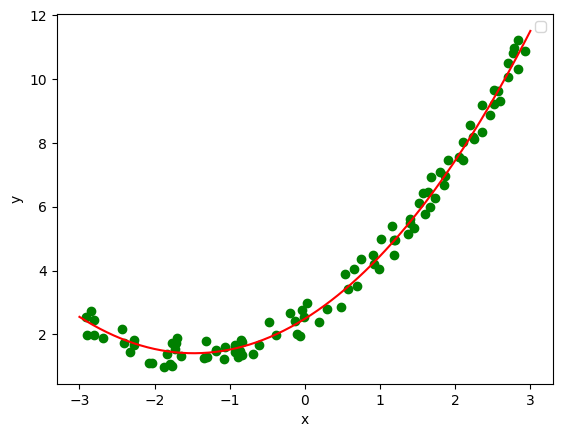

In [15]:
# Plot
plt.scatter(x, y, color='green')
plt.plot(x_new, x_new_poly, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [16]:
# Pipeline concept
from sklearn.pipeline import Pipeline
def poly_regression(degree):
    x_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    pipeline = Pipeline([
        ('poly_features', poly_features),
        ('lin_reg', lin_reg)
    ])
    # Fit and predict using the pipeline
    pipeline.fit(x_train, y_train)
    y_pred_new = pipeline.predict(x_new)

    # Plot prediction line
    plt.plot(x_new, y_pred_new, color='red', label='Degree')
    plt.plot(x_train, y_train, color='green', linewidth=3)
    plt.plot(x_test, y_test, color='blue', linewidth=3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='upper left')
    plt.axis([-4, 4, 0, 10])
    plt.show()

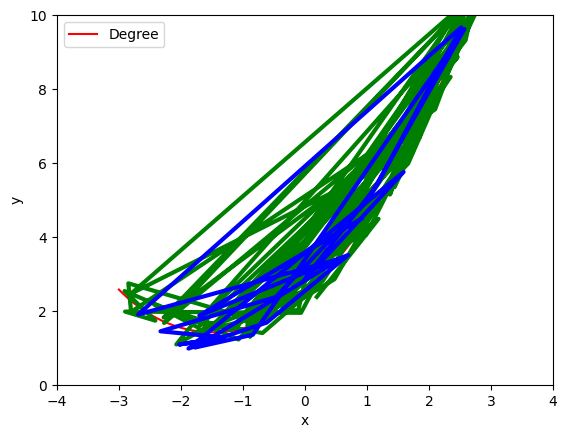

In [17]:
poly_regression(6)